In [1]:
import pandas as pd
import urllib.request
import re

data = pd.read_csv('./data/split/before_up_BCH0.csv', error_bad_lines=False)
#data = data.append(pd.read_csv('../../news/scraping_result/kr/2017_up1/2017_up1_(KR)Tokenpost.csv', error_bad_lines=False))


In [2]:
data = data.drop('Unnamed: 0',axis = 1)

In [3]:
data

,crypto,gubun,datetime,username,retweets,favorites,hashtags,text
0,BCH,up,2017-08-17 18:00:01,CryptoHourly,0,0,NaN,"@#3, Bitcoin Cash with unit price of $396.79, ..."
1,BCH,up,2017-08-17 18:00:10,JFBitcoin,1,1,NaN,Zatím mě ten BitcoinCash (BCH či BCC) překvapu...
2,BCH,up,2017-08-17 18:00:13,coinstats,0,0,#BitcoinCash #BCH,BitcoinCash - BCH Price: $387.95 Change in 1h:...
3,BCH,up,2017-08-17 18:00:21,FR_Conversation,3,2,#Bitcoin #Bitcoin,A quoi sert le #Bitcoin Cash? @JPhRennard @Gre...
4,BCH,up,2017-08-17 18:01:56,CriptoTendencia,5,6,NaN,Un banco suizo venderá Ethereum y Bitcoin Cash...
...,...,...,...,...,...,...,...,...
553,BCH,up,2017-08-17 23:56:22,ggty,0,0,NaN,Bitcoin: Bitcoin Cash se Recupera e Volta aos ...
554,BCH,up,2017-08-17 23:56:29,mikerelentless,0,1,#BitcoinCash #Bitcoin #Bitcoin,I nailed it 8 hours ago. BCH up 50% just like ...
555,BCH,up,2017-08-17 23:58:37,anymarques,0,0,NaN,Bitcoin: Bitcoin Cash se Recupera e Volta aos ...
556,BCH,up,2017-08-17 23:59:11,yoshidoesit,8,0,#bitcoin #bitcoin #bitcoincash #reddit,http://youtu.be/e_9QouZWUvc 0.1 #bitcoin #bitc...


In [4]:
pattern = '(http|ftp|https)://(?:[-\w.]|(?:%[\da-fA-F]{2}))+'

data['text'] = data['text'].apply(lambda x : re.sub(pattern=pattern, repl='', string=x ))
# text = re.sub(pattern=pattern, repl='', string=text)

In [5]:
text = data[['text']]
text['text'] = text.apply(lambda row: row['text'].replace("/"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("-"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("—"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("*"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("…"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("\\"," "), axis=1)
text['text'] = text.apply(lambda row: row['text'].replace("#"," "), axis=1)



/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [6]:
import nltk
text['text'] = text.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)
text['text'] = text['text'].apply(lambda x : [word.lower().replace("-","") for word in x])
text['text'] = text['text'].apply(lambda x : [word for word in x if word])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [7]:
text['text']

0      [@, 3, ,, bitcoin, cash, with, unit, price, of...
1      [zatím, mě, ten, bitcoincash, (, bch, či, bcc,...
2      [bitcoincash, bch, price, :, $, 387.95, change...
3      [a, quoi, sert, le, bitcoin, cash, ?, @, jphre...
4      [un, banco, suizo, venderá, ethereum, y, bitco...
                             ...                        
553    [bitcoin, :, bitcoin, cash, se, recupera, e, v...
554    [i, nailed, it, 8, hours, ago, ., bch, up, 50,...
555    [bitcoin, :, bitcoin, cash, se, recupera, e, v...
556     [e_9qouzwuvc, 0.1, bitcoin, bitcoincash, reddit]
557    [bitcoin, cash, gaining, in, value, just, does...
Name: text, Length: 558, dtype: object

In [8]:
from nltk.tag import pos_tag

text['pos tag'] = text.apply(lambda row: pos_tag(row['text']), axis=1)

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
# 불용어 품사 제거
text['text'] = text['pos tag'].apply(lambda x: [word[0] for word in x if word[1] not in ('CC','CD','DT','EX','IN','LS','MD','PRP','PRP$','RB','TO','UH','WDT','WP','WP$','WRB')])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
text['text'] = text['text'].apply(lambda x: [word for word in x if word not in (stop)])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
import csv
stopword_list =[]
f = open('../stopword/stop_en.txt', 'r')
reader = csv.reader(f)
for row in reader:
    #print(row[0])
    stopword_list.append(row[0])
    #pass
f.close()

text['text'] = text['text'].apply(lambda x: [word for word in x if word not in stopword_list])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [12]:
text['text']

0      [,, bitcoin, cash, unit, price, $, ,, market, ...
1      [zatím, mě, ten, bitcoincash, (, bch, či, bcc,...
2      [bitcoincash, bch, price, :, $, change, :, %, ...
3      [quoi, sert, le, bitcoin, cash, ?, @, jphrenna...
4      [un, banco, suizo, venderá, ethereum, bitcoin,...
                             ...                        
553    [bitcoin, :, bitcoin, cash, se, recupera, e, v...
554    [nailed, hours, ., bch, %, predicted, ., bitco...
555    [bitcoin, :, bitcoin, cash, se, recupera, e, v...
556                       [bitcoin, bitcoincash, reddit]
557    [bitcoin, cash, gaining, value, seem, exciting...
Name: text, Length: 558, dtype: object

In [13]:
pattern=re.compile(r'\.')
print(pattern.search('abc.de'))

text['text'] = text['text'].apply(lambda x: [word for word in x if pattern.search(word)== None])

<re.Match object; span=(3, 4), match='.'>


/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [14]:
number_pattern=re.compile(r'[0-9]\,[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
native_number_pattern=re.compile(r'[0-9]')
text['text'] = text['text'].apply(lambda x: [word for word in x if native_number_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [16]:
star_pattern=re.compile(r'[a-z0-9*]\*[a-z0-9*]')
text['text'] = text['text'].apply(lambda x: [word for word in x if star_pattern.search(word)== None])

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [17]:
from nltk.stem import WordNetLemmatizer
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='v') for word in x]) # 동사 
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='a') for word in x]) # 형용사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='n') for word in x]) # 명사
text['text'] = text['text'].apply(lambda x: [WordNetLemmatizer().lemmatize(word, pos='r') for word in x]) # 부사

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

In [18]:
tokenized_doc = text['text'].apply(lambda x: [word for word in x if len(word) > 3])
#print(tokenized_doc)

In [19]:
article_contents = tokenized_doc.values.tolist()

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

In [21]:
tokenized_doc_tfidf = tokenized_doc.apply(lambda x : ' '.join(x))

In [22]:
article_contents_tfidf = tokenized_doc_tfidf.values.tolist()

In [23]:
vectorizer = TfidfVectorizer()
sp_matrix = vectorizer.fit_transform([ " ".join(article_contents_tfidf) ])

In [24]:
word2id = defaultdict(lambda: 0)

In [25]:
for idx, feature in enumerate(vectorizer.get_feature_names()):
    word2id[feature] = idx

In [26]:
tf_idf_result = []
token_list = []
for i, sent in enumerate([" ".join(article_contents_tfidf)]):
    for token in sent.split() :
        if token not in token_list :
            temp=[]
            temp.append(token)
            temp.append(sp_matrix[i, word2id[token]])
            token_list.append(token)
            tf_idf_result.append(temp)

In [27]:
len(tf_idf_result)

888

In [28]:
tf_idf_value =[]
for tf_idf_element in tf_idf_result :
    tf_idf_value.append(tf_idf_element[1])
print(len(tf_idf_value))  ## tf-idf 값을 배열에 담음

888


In [29]:
from gensim import corpora
tokenized_doc = [d.split() for d in token_list]
dictionary = corpora.Dictionary(tokenized_doc)
corpus = [dictionary.doc2bow(text) for text in tokenized_doc]
print(corpus[1]) 

[(1, 1)]


In [30]:
sentences = article_contents

In [31]:
from gensim.models import Word2Vec

In [32]:
model = Word2Vec(sentences, min_count=1)

In [33]:
len(model.wv.vocab)

888

In [34]:
X = model[model.wv.vocab]

/Users/hongminpyo/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [35]:
from nltk.cluster import KMeansClusterer
import nltk
NUM_CLUSTERS=4
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
#kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.euclidean_distance, repeats=25)
#euclidean_distance
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
#print(X)
#print(assigned_clusters)

In [36]:
import pandas as pd
import numpy as np
temp_heder = ['raw_data','word','cluster','centroid','distance','tfidf','score','closer#']
temp_cluster_result = pd.DataFrame(columns=temp_heder)

In [37]:
temp_cluster_result['word'] = list(model.wv.vocab)

In [38]:
temp_cluster_result['cluster'] = assigned_clusters

In [39]:
temp_cluster_result['raw_data'] = X.tolist()

In [40]:
#temp_cluster_result['raw_data']
temp_cluster_result['centroid'] = temp_cluster_result['cluster'].apply(lambda x : kclusterer.means()[x])

In [41]:
from sklearn.metrics import pairwise_distances

In [42]:
cosine_centroid_list = []
for cosine_centroid in temp_cluster_result['centroid'] :
    cosine_centroid_list.append(cosine_centroid.tolist())

In [43]:
len(cosine_centroid_list)

888

In [44]:
temp_distance = pairwise_distances(X,cosine_centroid_list, metric='cosine')

In [45]:
sum(temp_distance[3])

75.99845497613512

In [46]:
import scipy.spatial.distance as dist

In [47]:
dist.cosine(X[0],cosine_centroid_list[0])

0.0017641877628357117

In [48]:
dist.euclidean(X[0],cosine_centroid_list[0])

0.5039393314004195

In [49]:
temp_cluster_result['distance'] = temp_cluster_result.apply(lambda x : dist.cosine(x.raw_data,x.centroid),axis=1)

In [50]:
temp_cluster_result['tfidf'] = tf_idf_value
temp_cluster_result['score'] = temp_cluster_result.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result

In [51]:
temp_cluster_result[temp_cluster_result['cluster']==0].sort_values(by=['score']).head(20)  # 기술

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.02280418574810028, -0.011426277458667755, ...",bitcoin,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.001764,0.717245,0.284520,NaN
1,"[-0.017088644206523895, -0.01596206985414028, ...",cash,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.002949,0.510121,0.492829,NaN
3,"[-0.0010443355422466993, -0.008445016108453274...",price,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.019754,0.264105,0.755649,NaN
234,"[-0.00464362557977438, 0.0001629939506528899, ...",break,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.024152,0.193557,0.830596,NaN
526,"[0.0008549893391318619, -0.0003887911443598568...",doldrums,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.030260,0.184512,0.845748,NaN
6,"[-0.01552158035337925, -0.004721648525446653, ...",bitcoincash,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.004895,0.140193,0.864703,NaN
533,"[-0.008017972111701965, 0.00021903231390751898...",push,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.039101,0.157378,0.881723,NaN
534,"[-0.007278078701347113, 0.0015678299823775887,...",past,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.029710,0.137479,0.892231,NaN
23,"[-0.005186730995774269, -0.0022775253746658564...",ethereum,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.008943,0.050650,0.958293,NaN
62,"[-0.007906132377684116, 0.0009831992210820317,...",blockchain,0,"[-0.001212811, -0.0010906361, -0.0024828545, -...",0.023329,0.045223,0.978106,NaN


In [52]:
temp_cluster_result[temp_cluster_result['cluster']==1].sort_values(by=['score']).head(30)  # 이슈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
585,"[-0.00384700670838356, -0.0024260671343654394,...",bchbtc,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.345121,0.001809,1.343312,NaN
673,"[0.0015721744857728481, 0.0006590317352674901,...",killer,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.387058,0.000904,1.386153,NaN
304,"[0.003510565496981144, -0.001546252053231001, ...",fraud,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.465182,0.000904,1.464278,NaN
312,"[-0.0024994651321321726, -0.001352008897811174...",merkezli,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.470179,0.000904,1.469275,NaN
278,"[-0.004426398314535618, 0.004266457632184029, ...",irmã,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.499142,0.000904,1.498238,NaN
264,"[-0.004471261985599995, 0.004700657445937395, ...",arriscar,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.502019,0.000904,1.501115,NaN
800,"[-0.004503744188696146, 0.0028423871845006943,...",spot,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.527286,0.000904,1.526381,NaN
426,"[0.0011394030880182981, -0.0033426894806325436...",sophisticate,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.530008,0.000904,1.529104,NaN
235,"[-0.004205492790788412, -0.0008608638891018927...",technic,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.532288,0.001809,1.530479,NaN
640,"[-7.582249236293137e-05, 0.0006081265746615827...",difficult,1,"[-0.0015567701, 0.0005466016, -0.0006448378, -...",0.542553,0.000904,1.541648,NaN


In [53]:
temp_cluster_result[temp_cluster_result['cluster']==2].sort_values(by=['score']).head(20)   # 기타

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
448,"[0.00035660690627992153, -0.000852785480674356...",flood,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.295295,0.001809,1.293486,NaN
446,"[0.000309129391098395, -0.0020464840345084667,...",somebody,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.343085,0.001809,1.341276,NaN
777,"[0.002572737168520689, 0.00014979933621361852,...",airbitz,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.379995,0.002713,1.377281,NaN
591,"[-0.005058818496763706, -0.004905671812593937,...",cependant,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.391546,0.000904,1.390642,NaN
118,"[0.002752722939476371, 0.002806710312142968, 0...",mantle,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.399068,0.002713,1.396355,NaN
765,"[-0.0013344069011509418, 0.0031543381046503782...",singapore,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.400756,0.000904,1.399852,NaN
391,"[0.0028522212523967028, -0.0051966323517262936...",hack,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.415836,0.000904,1.414931,NaN
703,"[0.004306270275264978, 0.004254105966538191, -...",arruinen,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.420027,0.000904,1.419123,NaN
826,"[-0.0001519092620583251, -0.003414802951738238...",valid,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.423928,0.000904,1.423023,NaN
661,"[0.0035513315815478563, 0.0027282233349978924,...",pfpmlp,2,"[0.0005763819, -0.0008988759, -0.0006390751, -...",0.424347,0.000904,1.423443,NaN


In [54]:
temp_cluster_result[temp_cluster_result['cluster']==3].sort_values(by=['score']).head(20)  # 비즈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
245,"[0.0032567824237048626, -0.0016127993585541844...",paul,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.302358,0.001809,1.300549,NaN
547,"[-0.0030325856059789658, -0.001926985452882945...",payment,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.344953,0.003618,1.341335,NaN
160,"[0.002418851712718606, 0.0013541055377572775, ...",cryptocurrencies,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.371231,0.001809,1.369422,NaN
783,"[-0.0038217257242649794, 0.0030272032599896193...",coinma,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.377598,0.000904,1.376694,NaN
487,"[0.0006470668013207614, -0.0038001644425094128...",subiendo,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.379549,0.000904,1.378645,NaN
314,"[-0.001267015002667904, -0.0019469588296487927...",müşterilerine,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.386197,0.000904,1.385292,NaN
517,"[-0.003740280168130994, -0.003706270596012473,...",minarlo,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.391959,0.001809,1.390150,NaN
675,"[-0.0008148743072524667, 0.0038306424394249916...",breach,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.401699,0.000904,1.400794,NaN
467,"[-0.0002890450123231858, 0.0006272329483181238...",implement,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.428378,0.000904,1.427474,NaN
99,"[-0.005367147736251354, 0.0017194637330248952,...",exact,3,"[-0.00086669525, 7.148768e-05, -0.0007661422, ...",0.436226,0.000904,1.435321,NaN


In [55]:
y_km = temp_cluster_result['cluster'].values

In [56]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

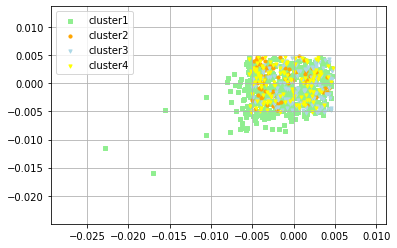

In [57]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[y_km==4,0],X[y_km==4,1],c='red',marker='v',s=10 , label='cluster5')
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],c='red',marker='*',s=30 , label='center cluster')

plt.legend()
plt.grid(True)
plt.show()

In [58]:
len(temp_cluster_result[temp_cluster_result['cluster']==0]) # 기술

554

In [59]:
len(temp_cluster_result[temp_cluster_result['cluster']==1]) # 이슈

68

In [60]:
len(temp_cluster_result[temp_cluster_result['cluster']==2]) # 기타

138

In [61]:
len(temp_cluster_result[temp_cluster_result['cluster']==3]) # 비즈

128

In [62]:
temp_cluster_result['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [63]:
#temp_cluster_result['label'] = 2 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [64]:
temp_cluster_result.loc[temp_cluster_result['cluster']==0,'label'] = 9 # 기술

In [65]:
temp_cluster_result.loc[temp_cluster_result['cluster']==1,'label'] = 5 # 이슈

In [66]:
temp_cluster_result.loc[temp_cluster_result['cluster']==2,'label'] = 13 # 기타

In [67]:
temp_cluster_result.loc[temp_cluster_result['cluster']==3,'label'] = 7 # 비즈

In [68]:
from sklearn import cluster
from sklearn import metrics
kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

KMeans(n_clusters=4)

In [69]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [70]:
kmeans.inertia_

0.8850395679473877

In [71]:
print ("Cluster id labels for inputted data")
print (labels)

Cluster id labels for inputted data
[1 1 0 2 3 0 1 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 2 0 3 2 2 3 0 0 0 2 0 3 0 0
 2 2 0 3 0 3 0 0 0 0 3 0 0 0 0 0 0 0 2 0 3 0 0 0 0 2 3 2 2 2 2 2 0 0 0 0 0
 0 2 3 3 2 2 2 2 0 0 0 0 0 0 0 0 0 3 0 0 2 3 0 0 3 0 3 0 0 0 0 0 2 2 2 3 3
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 2 0 0 0 0 2 2 2 0 0 0 0
 0 0 3 0 3 3 2 0 0 3 0 0 0 0 0 0 0 3 3 0 0 3 0 3 0 0 0 0 0 3 0 2 0 3 3 0 2
 0 3 0 3 0 0 0 3 0 0 0 0 0 0 0 3 0 3 0 3 0 3 0 0 2 2 3 2 3 2 3 2 0 0 0 0 3
 0 0 3 3 0 0 0 0 0 0 3 0 2 0 2 0 3 0 3 0 3 3 0 0 0 0 0 3 2 0 0 0 0 0 3 0 0
 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 3 0 0 0 0 0 0 0 0
 0 0 0 0 3 0 0 3 0 0 0 3 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0 0 0 2 0 2 0 3 3 0
 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 3 3 3 0 0 0 0 3 0 0 3 0 0 3 0 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0

In [72]:
cluster_values= list(model.wv.vocab)

In [73]:
print ("Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):")
print (kmeans.score(X))

Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):
-0.8850395679473877


In [74]:
silhouette_score = metrics.silhouette_score(X, labels, metric='euclidean')

In [75]:
print ("Silhouette_score: ")
print (silhouette_score)

Silhouette_score: 
0.25081453


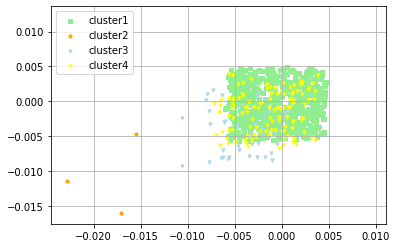

In [76]:
kmeans_label = kmeans.labels_

plt.scatter(X[kmeans_label==0,0],X[kmeans_label==0,1],c='lightgreen',marker='s',s=10 , label='cluster1')
plt.scatter(X[kmeans_label==1,0],X[kmeans_label==1,1],c='orange',marker='o',s=10 , label='cluster2')
plt.scatter(X[kmeans_label==2,0],X[kmeans_label==2,1],c='lightblue',marker='v',s=10 , label='cluster3')
plt.scatter(X[kmeans_label==3,0],X[kmeans_label==3,1],c='yellow',marker='v',s=10 , label='cluster4')
#plt.scatter(X[kmeans_label==4,0],X[kmeans_label==4,1],c='red',marker='v',s=10 , label='cluster5')

plt.legend()
plt.grid(True)
plt.show()

In [77]:
temp_cluster_result1 = pd.DataFrame(columns=temp_heder)
temp_cluster_result1['word'] = list(model.wv.vocab)
temp_cluster_result1['cluster'] = kmeans_label

In [78]:
#temp_cluster_result1[temp_cluster_result1['cluster']==0].head(30) #시도 및 혼돈  # 혼란 부정적 
temp_cluster_result1['raw_data'] = X.tolist()

In [79]:
temp_cluster_result1['centroid'] = temp_cluster_result1['cluster'].apply(lambda x : centroids[x])

In [80]:
euclidean_centroid_list = []
for euclidean_centroid in temp_cluster_result1['centroid'] :
    euclidean_centroid_list.append(euclidean_centroid.tolist())

In [81]:
temp_distance1 = pairwise_distances(X,euclidean_centroid_list, metric='euclidean')

In [82]:
import scipy.spatial.distance as dist

In [83]:
temp_cluster_result1['distance'] = temp_cluster_result1.apply(lambda x : dist.euclidean(x.raw_data,x.centroid),axis=1)

In [84]:
temp_cluster_result1['tfidf'] = tf_idf_value
temp_cluster_result1['score'] = temp_cluster_result1.apply(lambda x : x.distance + (1- x.tfidf),axis=1)
#temp_cluster_result1

In [85]:
temp_cluster_result1[temp_cluster_result1['cluster']==0].sort_values('score',ascending=False).nsmallest(50,'score') # 거래소돈

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
2,"[-0.004567870404571295, 0.0009785282891243696,...",unit,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.028306,0.005427,1.022879,NaN
322,"[-0.0015959579031914473, -0.005154557526111603...",post,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.026230,0.002713,1.023517,NaN
353,"[-0.000800197129137814, 0.003422088921070099, ...",effective,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.025508,0.001809,1.023700,NaN
12,"[-0.0028760426212102175, 0.0019232707563787699...",díky,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.024784,0.000904,1.023879,NaN
71,"[0.0014072477351874113, 0.0012924778275191784,...",получить,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.026623,0.002713,1.023909,NaN
825,"[-0.002180523471906781, -0.0042319828644394875...",valuable,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.024975,0.000904,1.024071,NaN
462,"[-0.001965788658708334, -0.0024822289124131203...",fade,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.027027,0.002713,1.024314,NaN
504,"[-0.0013088571140542626, -0.002712046261876821...",expect,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.025466,0.000904,1.024562,NaN
852,"[-0.005024046171456575, -0.0007353643304668367...",今日もこの戦闘力を活かして丸の内のolと食事からの優勝するとしますか,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.025743,0.000904,1.024839,NaN
325,"[-0.004668422043323517, 0.0024583498015999794,...",index,0,"[-0.00054824253, -0.0004138384, -0.00095562136...",0.025814,0.000904,1.024910,NaN


In [86]:
temp_cluster_result1[temp_cluster_result1['cluster']==1].sort_values('score',ascending=False).nsmallest(50,'score') # 투자

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
0,"[-0.02280418574810028, -0.011426277458667755, ...",bitcoin,1,"[-0.018471472, -0.010703333, -0.027734913, -0....",0.117471,0.717245,0.400226,NaN
1,"[-0.017088644206523895, -0.01596206985414028, ...",cash,1,"[-0.018471472, -0.010703333, -0.027734913, -0....",0.025663,0.510121,0.515542,NaN
6,"[-0.01552158035337925, -0.004721648525446653, ...",bitcoincash,1,"[-0.018471472, -0.010703333, -0.027734913, -0....",0.115293,0.140193,0.975100,NaN


In [87]:
temp_cluster_result1[temp_cluster_result1['cluster']==2].sort_values('score',ascending=False).nsmallest(20,'score')  # 거래소

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
3,"[-0.0010443355422466993, -0.008445016108453274...",price,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.033108,0.264105,0.769003,NaN
234,"[-0.00464362557977438, 0.0001629939506528899, ...",break,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.031698,0.193557,0.838141,NaN
526,"[0.0008549893391318619, -0.0003887911443598568...",doldrums,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.034527,0.184512,0.850016,NaN
533,"[-0.008017972111701965, 0.00021903231390751898...",push,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.039994,0.157378,0.882616,NaN
534,"[-0.007278078701347113, 0.0015678299823775887,...",past,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.032985,0.137479,0.895506,NaN
62,"[-0.007906132377684116, 0.0009831992210820317,...",blockchain,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.029364,0.045223,0.984140,NaN
65,"[-0.007737929467111826, -0.0013364305486902595...",block,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.035255,0.034370,1.000885,NaN
319,"[0.00033531038207001984, -0.002056204713881015...",news,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.031276,0.028039,1.003238,NaN
32,"[-0.005987121257930994, -0.002875586738809943,...",cryptocurrency,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.027680,0.023516,1.004164,NaN
365,"[-0.002498134970664978, -0.005978898610919714,...",rise,2,"[-0.003843079, -0.003674505, -0.009122853, -0....",0.030829,0.019898,1.010931,NaN


In [88]:
temp_cluster_result1[temp_cluster_result1['cluster']==3].sort_values('score',ascending=False).nsmallest(20,'score') # 긍정

,raw_data,word,cluster,centroid,distance,tfidf,score,closer#
4,"[-0.0015318666119128466, -0.003371996339410543...",market,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.032151,0.028039,1.004112,NaN
14,"[-0.006935340352356434, -0.004902332555502653,...",change,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.030982,0.017185,1.013797,NaN
206,"[-0.007150742225348949, -0.0002317336911801248...",analysis,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.045888,0.026230,1.019658,NaN
153,"[0.0009177378960885108, 0.0003773123607970774,...",take,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.027421,0.005427,1.021995,NaN
211,"[-0.0027230503037571907, -0.003683950053527951...",give,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.025934,0.003618,1.022316,NaN
157,"[-0.0011203121393918991, 0.0012310484889894724...",korean,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.026802,0.003618,1.023184,NaN
401,"[-0.0022233163472265005, -0.000181464347406290...",test,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.026858,0.003618,1.023240,NaN
238,"[-0.004133414011448622, 0.0009579769102856517,...",claim,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.029656,0.006331,1.023325,NaN
486,"[0.0010868471581488848, 0.00019318584236316383...",iota,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.027013,0.003618,1.023395,NaN
398,"[-0.0032507742289453745, 0.0031729373149573803...",explode,3,"[-0.0014714964, -0.0014811511, -0.0033391053, ...",0.027402,0.003618,1.023784,NaN


In [89]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==0]) # 긍정

720

In [90]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==1]) # 투자

3

In [91]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==2]) # 거래소

49

In [92]:
len(temp_cluster_result1[temp_cluster_result1['cluster']==3]) # 긍정

116

In [98]:
temp_cluster_result1['category'] = 3 # 1 영문뉴스, 2 국문뉴스 , 3 twitter

In [93]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==0,'label'] = 1 # 긍정

In [94]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==1,'label'] = 11 # 투자

In [95]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==2,'label'] = 12 # 거래소

In [96]:
temp_cluster_result1.loc[temp_cluster_result1['cluster']==3,'label'] = 1 # 긍정

In [97]:
temp_cluster_result1['Silhouette'] = 0.25081453
temp_cluster_result['Silhouette'] = 0.25081453
temp_cluster_result1['result'] = 1
temp_cluster_result['result'] = 1

In [98]:
temp_cluster_result1.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_BCH0_euclidean.csv")
temp_cluster_result.to_csv("../analysis/cluster/causeanalysis/BTC/before_up_BCH0_cosine")